In [124]:
import pandas as pd
import matplotlib
import os
import re
import numpy as np

In [125]:
# 開くファイル指定

# データファイル
path = input("data folder path?")
if path == "" :
    path = "./"
if path[-1] != "/":
    path += "/"
    
_list = os.listdir(path)

csv_list = []
for name in _list:
    if re.fullmatch(".+\.csv", name):
        # 正規表現 csvファイルget
        csv_list.append(name)
for i, name in enumerate(csv_list):
    print(i, ":" ,name)

num = int(input("which csv file open? type num : "))
try:
    path = path + csv_list[num]
    print("open :", path)
except Exception:
    print("error")
    exit()

#ラベルファイル
label_path = input("label folder path?")
if label_path == "" :
    label_path = "./"
if label_path[-1] != "/":
    label_path += "/"
    
_list = os.listdir(label_path)

csv_list = []
for name in _list:
    if re.fullmatch(".+\.csv", name):
        # 正規表現 csvファイルget
        csv_list.append(name)
for i, name in enumerate(csv_list):
    print(i, ":" ,name)

num = int(input("which csv file open? type num : "))
try:
    label_path = label_path + csv_list[num]
    print("open :", label_path)
except Exception:
    print("error")
    exit()



0 : x_large.csv
1 : x_large3.csv
2 : x_large3_fixed.csv
3 : y_large.csv
4 : y_large3.csv
5 : y_large3_fixed.csv
open : ../hasc/x_large3.csv
0 : x_large.csv
1 : x_large3.csv
2 : x_large3_fixed.csv
3 : y_large.csv
4 : y_large3.csv
5 : y_large3_fixed.csv
open : ../hasc/y_large3.csv


In [132]:
# フレームサイズ指定, numpy配列に格納
"""
frame_size = int( input ("frame size?") )
# data = np.loadtxt(path, delimiter=",").reshape(-1, frame_size, 3)
# ここはデータに応じて書き換える必要がある．
"""

'''
# hasc で取ってきた個人の一つのデータならこれ
data = pd.read_csv(path, header = None, names = ["time", "x", "y", "z"], index_col = 0)
data.head()
data.plot(figsize = (7, 4))
data.plot(subplots=True, layout=(3, 1),
        sharex=True, sharey=True,
         figsize = (15, 10))
'''


# 研究室内HASCデータセット用プログラム
data = np.loadtxt(path, delimiter=",").reshape(-1, 256, 3)
print("data len : ", data.shape[0])

data len :  36871


In [170]:
'''
#研究室内hascデータセット用

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))


plt.subplot(2, 2, 1)
plt.plot(data[0, :, 0], label="x")
plt.subplot(2, 2, 2)
plt.plot(data[0, :, 1], label="y", color = "orange")

plt.subplot(2, 2, 3)
plt.plot(data[0, :, 2], label="z", color = "green")

plt.subplot(2, 2, 4)
plt.plot(data[0, :, 0] - np.mean(data[0, :, 0]), label="x")
plt.plot(data[0, :, 1] - np.mean(data[0, :, 1]), label="y")
plt.plot(data[0, :, 2] - np.mean(data[0, :, 2]), label="z")
plt.title("center awase")

axs = plt.gcf().get_axes()

# 軸毎にループ
for ax in axs:
    # 現在の軸を変更
    plt.axes(ax)

    # 凡例を表示
    plt.legend(loc = 3)

    # グリッド
    plt.grid(linestyle='--')

    # 軸ラベル
    plt.xlabel('')
    plt.ylabel('acc')

    # 軸の範囲
    plt.xlim([  0, 256])
'''
pass

0 : stay
1 : walk
2 : jog
3 : skip
4 : stUp
5 : stDown
6 : stayDown
7 : ststUp
8 : ststDown
9 : sequence
10 : Walk
11 : Jog
12 : Skip
13 : nan
14 : Down
15 : up
No handles with labels found to put in legend.
plot 1 datas


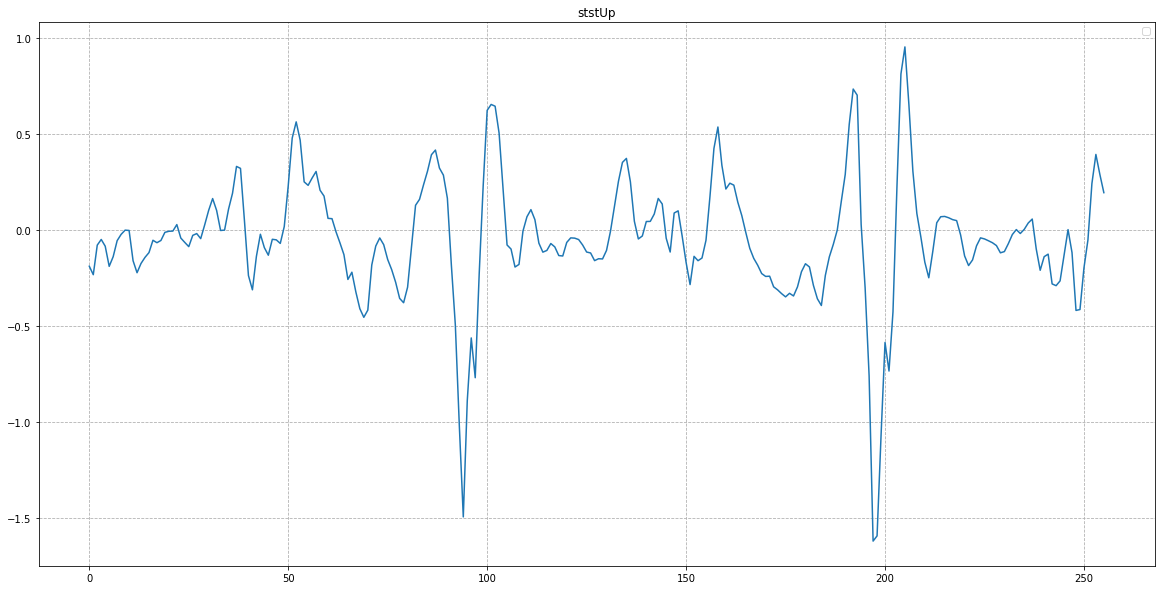

In [177]:
#研究室内hascデータセット用
labels = pd.read_csv(label_path, index_col=0)
label_list = labels["Activity"].unique()

for i, label  in enumerate(label_list):
    print(i, ":", label)

label_num = int ( input("which activity ?"))
label_index = labels[ labels["Activity"] == label_list[label_num] ].index
# print(label_index)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

plt.title(label_list[label_num])
plt.grid(linestyle='--')

for i, index in enumerate(label_index):
    if i + 1 > 1:
        print("plot {} datas".format(i) )
        break
    plt.plot(data[index, :, 0])
   
plt.legend()
plt.show()
